# **BBC News Categorization with TF-IDF**

**Loading the Data**

https://www.kaggle.com/yufengdev/bbc-fulltext-and-category

**Importing the libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score

**Importing the dataset**

In [2]:
dataSet = pd.read_csv('/content/bbc-text.csv')

In [3]:
# print out some data
print('Data shape (rows, cols): ', dataSet.shape)
dataSet.head(10)

Data shape (rows, cols):  (2225, 2)


,category,text
0,tech,tv future in the hands of viewers with home th...
1,business,worldcom boss left books alone former worldc...
2,sport,tigers wary of farrell gamble leicester say ...
3,sport,yeading face newcastle in fa cup premiership s...
4,entertainment,ocean s twelve raids box office ocean s twelve...
5,politics,howard hits back at mongrel jibe michael howar...
6,politics,blair prepares to name poll date tony blair is...
7,sport,henman hopes ended in dubai third seed tim hen...
8,sport,wilkinson fit to face edinburgh england captai...
9,entertainment,last star wars not for children the sixth an...


In [4]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2225 entries, 0 to 2224
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   category  2225 non-null   object
 1   text      2225 non-null   object
dtypes: object(2)
memory usage: 34.9+ KB


/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


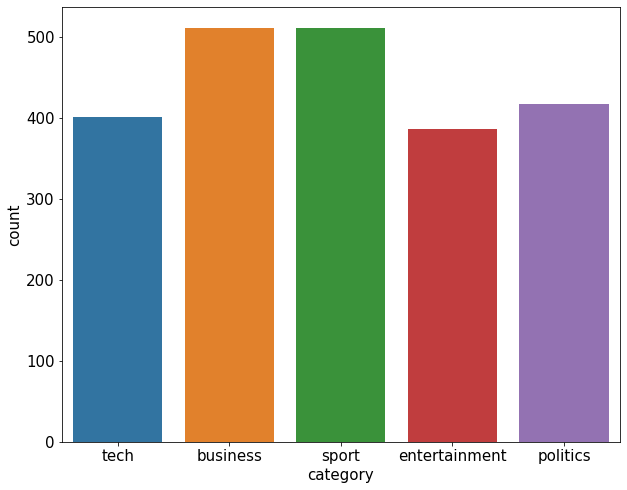

In [5]:
plt.figure(figsize=(10, 8))
font = {'weight': 'normal','size': 15}
plt.rc('font', **font)
plt.xlabel('category')
sns.countplot(dataSet['category'].values)
plt.show()

**Importing NLTK Library**

In [6]:
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [7]:
n =  dataSet.shape[0]
corpus = []
ps = PorterStemmer()

for i in range(n):
    text = re.sub('[^a-zA-Z]', ' ', dataSet['text'][i].lower())
    text = text.split()  # Spliting text into words
    text = [ps.stem(word) for word in text if not word in set(stopwords.words('english'))]  # Removing stopwords & # stemming
    text = ' '.join(text)  #Joining text
    corpus.append(text)

**Splitting the dataset into the Training set and Test set**

In [8]:
X = corpus
y = dataSet.iloc[:, 0].values

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [9]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train)
y_test = le.transform(y_test)

**Features Extraction**

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(X_train).toarray()
X_test = vectorizer.transform(X_test).toarray()

In [11]:
vectorizer.vocabulary_

{'dominici': 4371,
 'back': 1053,
 'lacklustr': 8612,
 'franc': 5793,
 'wing': 17053,
 'christoph': 2761,
 'say': 13446,
 'claim': 2820,
 'anoth': 626,
 'six': 14096,
 'nation': 10452,
 'grand': 6429,
 'slam': 14136,
 'despit': 4022,
 'two': 15979,
 'win': 17040,
 'far': 5306,
 'scotland': 13552,
 'england': 4901,
 'champion': 2595,
 'saw': 13442,
 'scot': 13551,
 'pari': 11320,
 'need': 10496,
 'self': 13662,
 'destruct': 4027,
 'last': 8698,
 'week': 16867,
 'english': 4902,
 'play': 11758,
 'better': 1486,
 'us': 16390,
 'lost': 9122,
 'wherea': 16941,
 'still': 14725,
 'race': 12355,
 'said': 13309,
 'know': 8490,
 'display': 4256,
 'perfect': 11528,
 'along': 426,
 'ireland': 7861,
 'wale': 16724,
 'remain': 12736,
 'unbeaten': 16064,
 'round': 13163,
 'year': 17298,
 'rb': 12499,
 'celtic': 2528,
 'impress': 7519,
 'rugbi': 13215,
 'take': 15190,
 'stade': 14583,
 'de': 3773,
 'februari': 5376,
 'dublin': 4525,
 'march': 9452,
 'although': 441,
 'yet': 17314,
 'click': 2890,
 'ha

In [12]:
X_train.shape

(1780, 17427)

In [13]:
X_train[0][:150]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
def report(y_test, y_pred):
  from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, precision_score, f1_score
  import seaborn as sns

  cm = confusion_matrix(y_test, y_pred)
  cm = pd.DataFrame(cm, le.classes_, le.classes_)
  print('Accuracy:', accuracy_score(y_test, y_pred), sep='\t')
  print('\n')

  plt.figure(figsize=(8, 6))
  sns.heatmap(cm, annot=True, cmap='YlGnBu', fmt = 'd', annot_kws={"size": 35}).set_title('Confusion Matrix')
  plt.show()

##Training The Model Using BernoulliNB

In [23]:
acc = {}

Accuracy:	0.9775280898876404




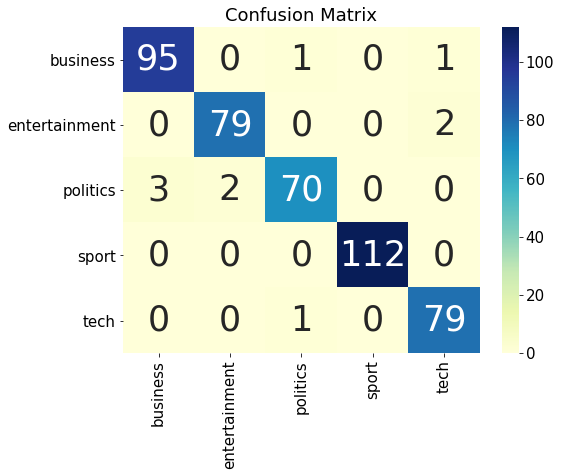

In [24]:
from sklearn.naive_bayes import BernoulliNB

model = BernoulliNB(alpha=0.01)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['BernoulliNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using ComplementNB

Accuracy:	0.9887640449438202




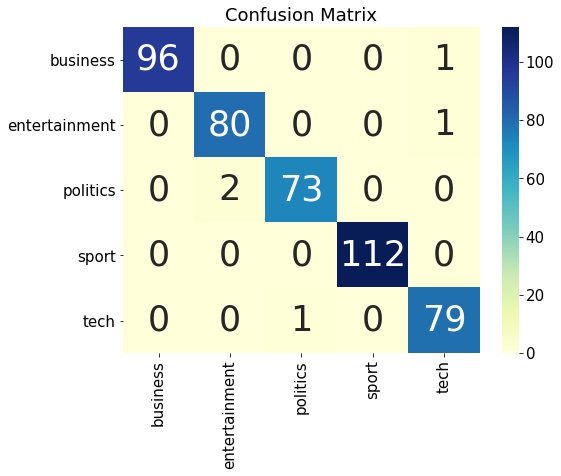

In [25]:
from sklearn.naive_bayes import ComplementNB

model = ComplementNB(alpha=0.2)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['ComplementNB'] = accuracy_score(y_test, y_pred)

##Training The Model Using MultinomialNB

Accuracy:	0.9932584269662922




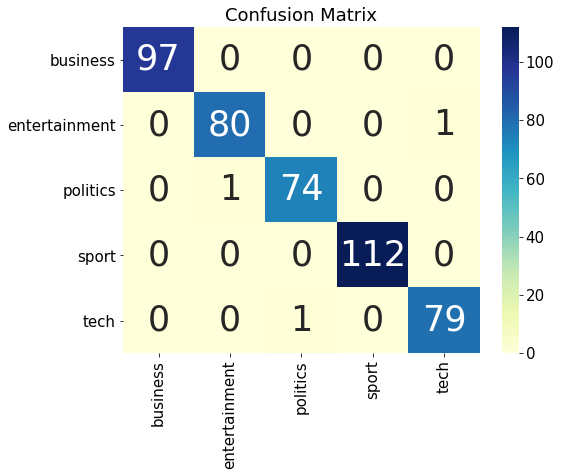

In [26]:
from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB(alpha = 0.1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['MultinomialNB'] = accuracy_score(y_test, y_pred)

## Training The Model Using LogisticRegression

Accuracy:	0.9887640449438202




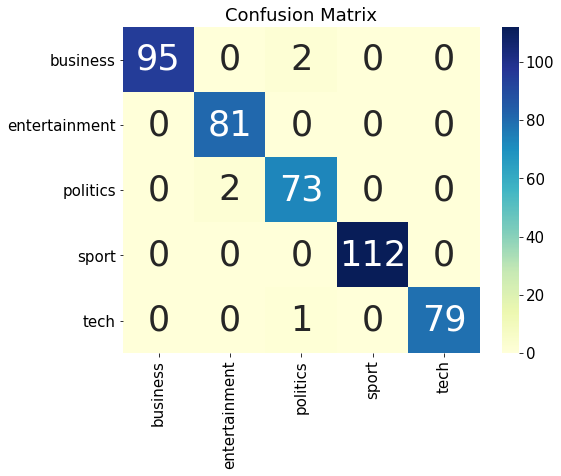

In [27]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(C = 2, 
                           random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['LogisticRegression'] = accuracy_score(y_test, y_pred)

## Training The Model Using RandomForestClassifier

Accuracy:	0.9775280898876404




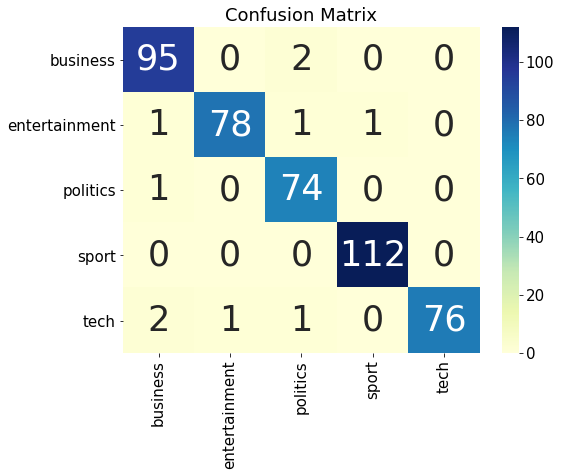

In [28]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators = 100, 
                               criterion = 'gini', 
                               random_state = 0)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['RandomForestClassifier'] = accuracy_score(y_test, y_pred)

##Training The Model Using SVC

Accuracy:	0.9910112359550561




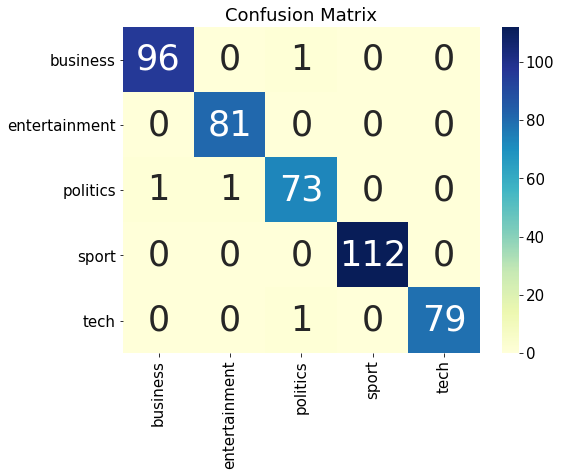

In [29]:
from sklearn.svm import SVC

model = SVC(kernel = 'rbf',
            random_state = 0)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

report(y_test, y_pred)
acc['SVC'] = accuracy_score(y_test, y_pred)

In [32]:
pd.DataFrame(data = acc.values(),
             index = acc.keys(),
             columns = ['Accuracy']).sort_values(ascending = False, by = ['Accuracy'])

,Accuracy
MultinomialNB,0.993258
SVC,0.991011
ComplementNB,0.988764
LogisticRegression,0.988764
BernoulliNB,0.977528
RandomForestClassifier,0.977528
